## Red wine quality

### Import needed libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,  cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Data collection and information

In [117]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [119]:
df.describe(include='all').T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


## Data cleaning and processing

In [120]:
df.shape

(1599, 12)

In [121]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [123]:
df['quality'].value_counts() 


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Counting the number of wines using the quality number (3, 4, 5, 6, 7, 8)
### Here we can assume that -
#### 3 : Bad quality
#### 4 : Bad quality
#### 5 : Middle quality
#### 6 : Middle quality
#### 7 : Good quality
#### 8 : Good quality

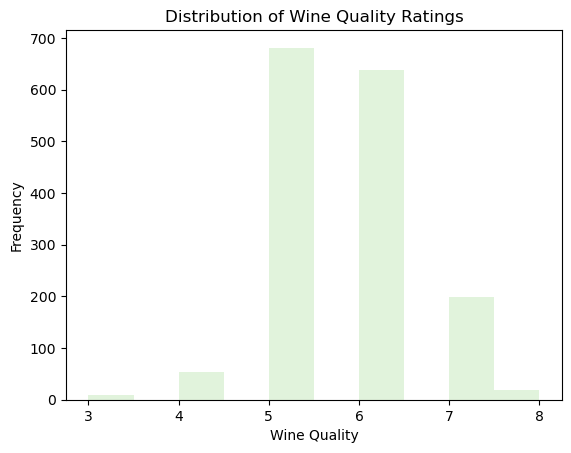

In [124]:
plt.hist(df['quality'])
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

### Nested histogram to compare the relationships with wine quality

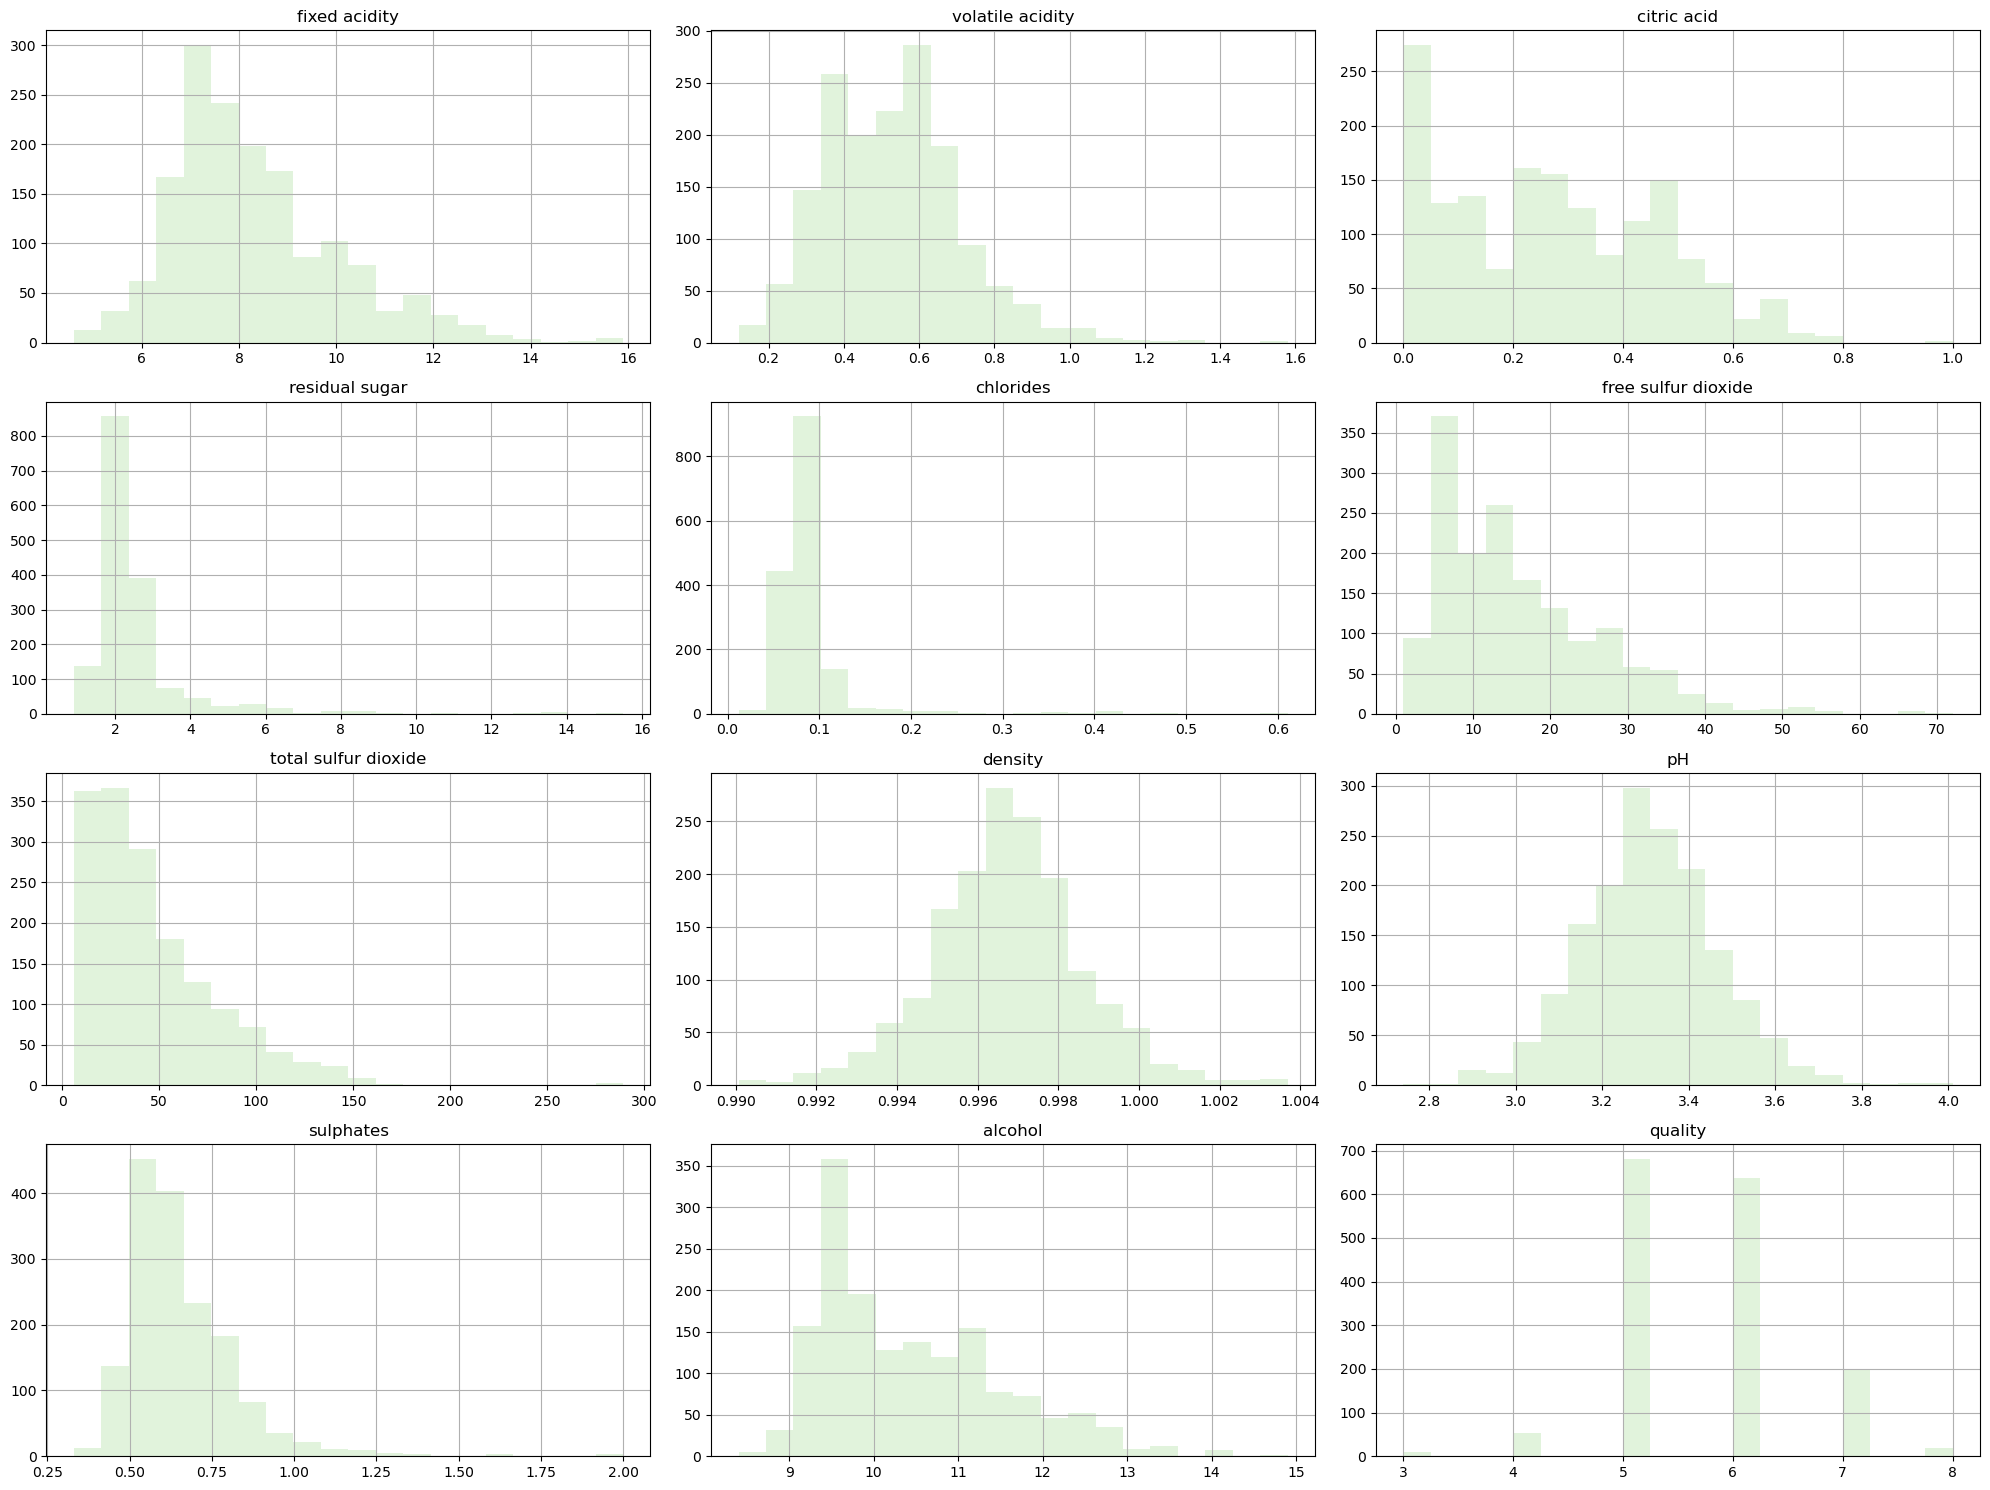

In [125]:
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

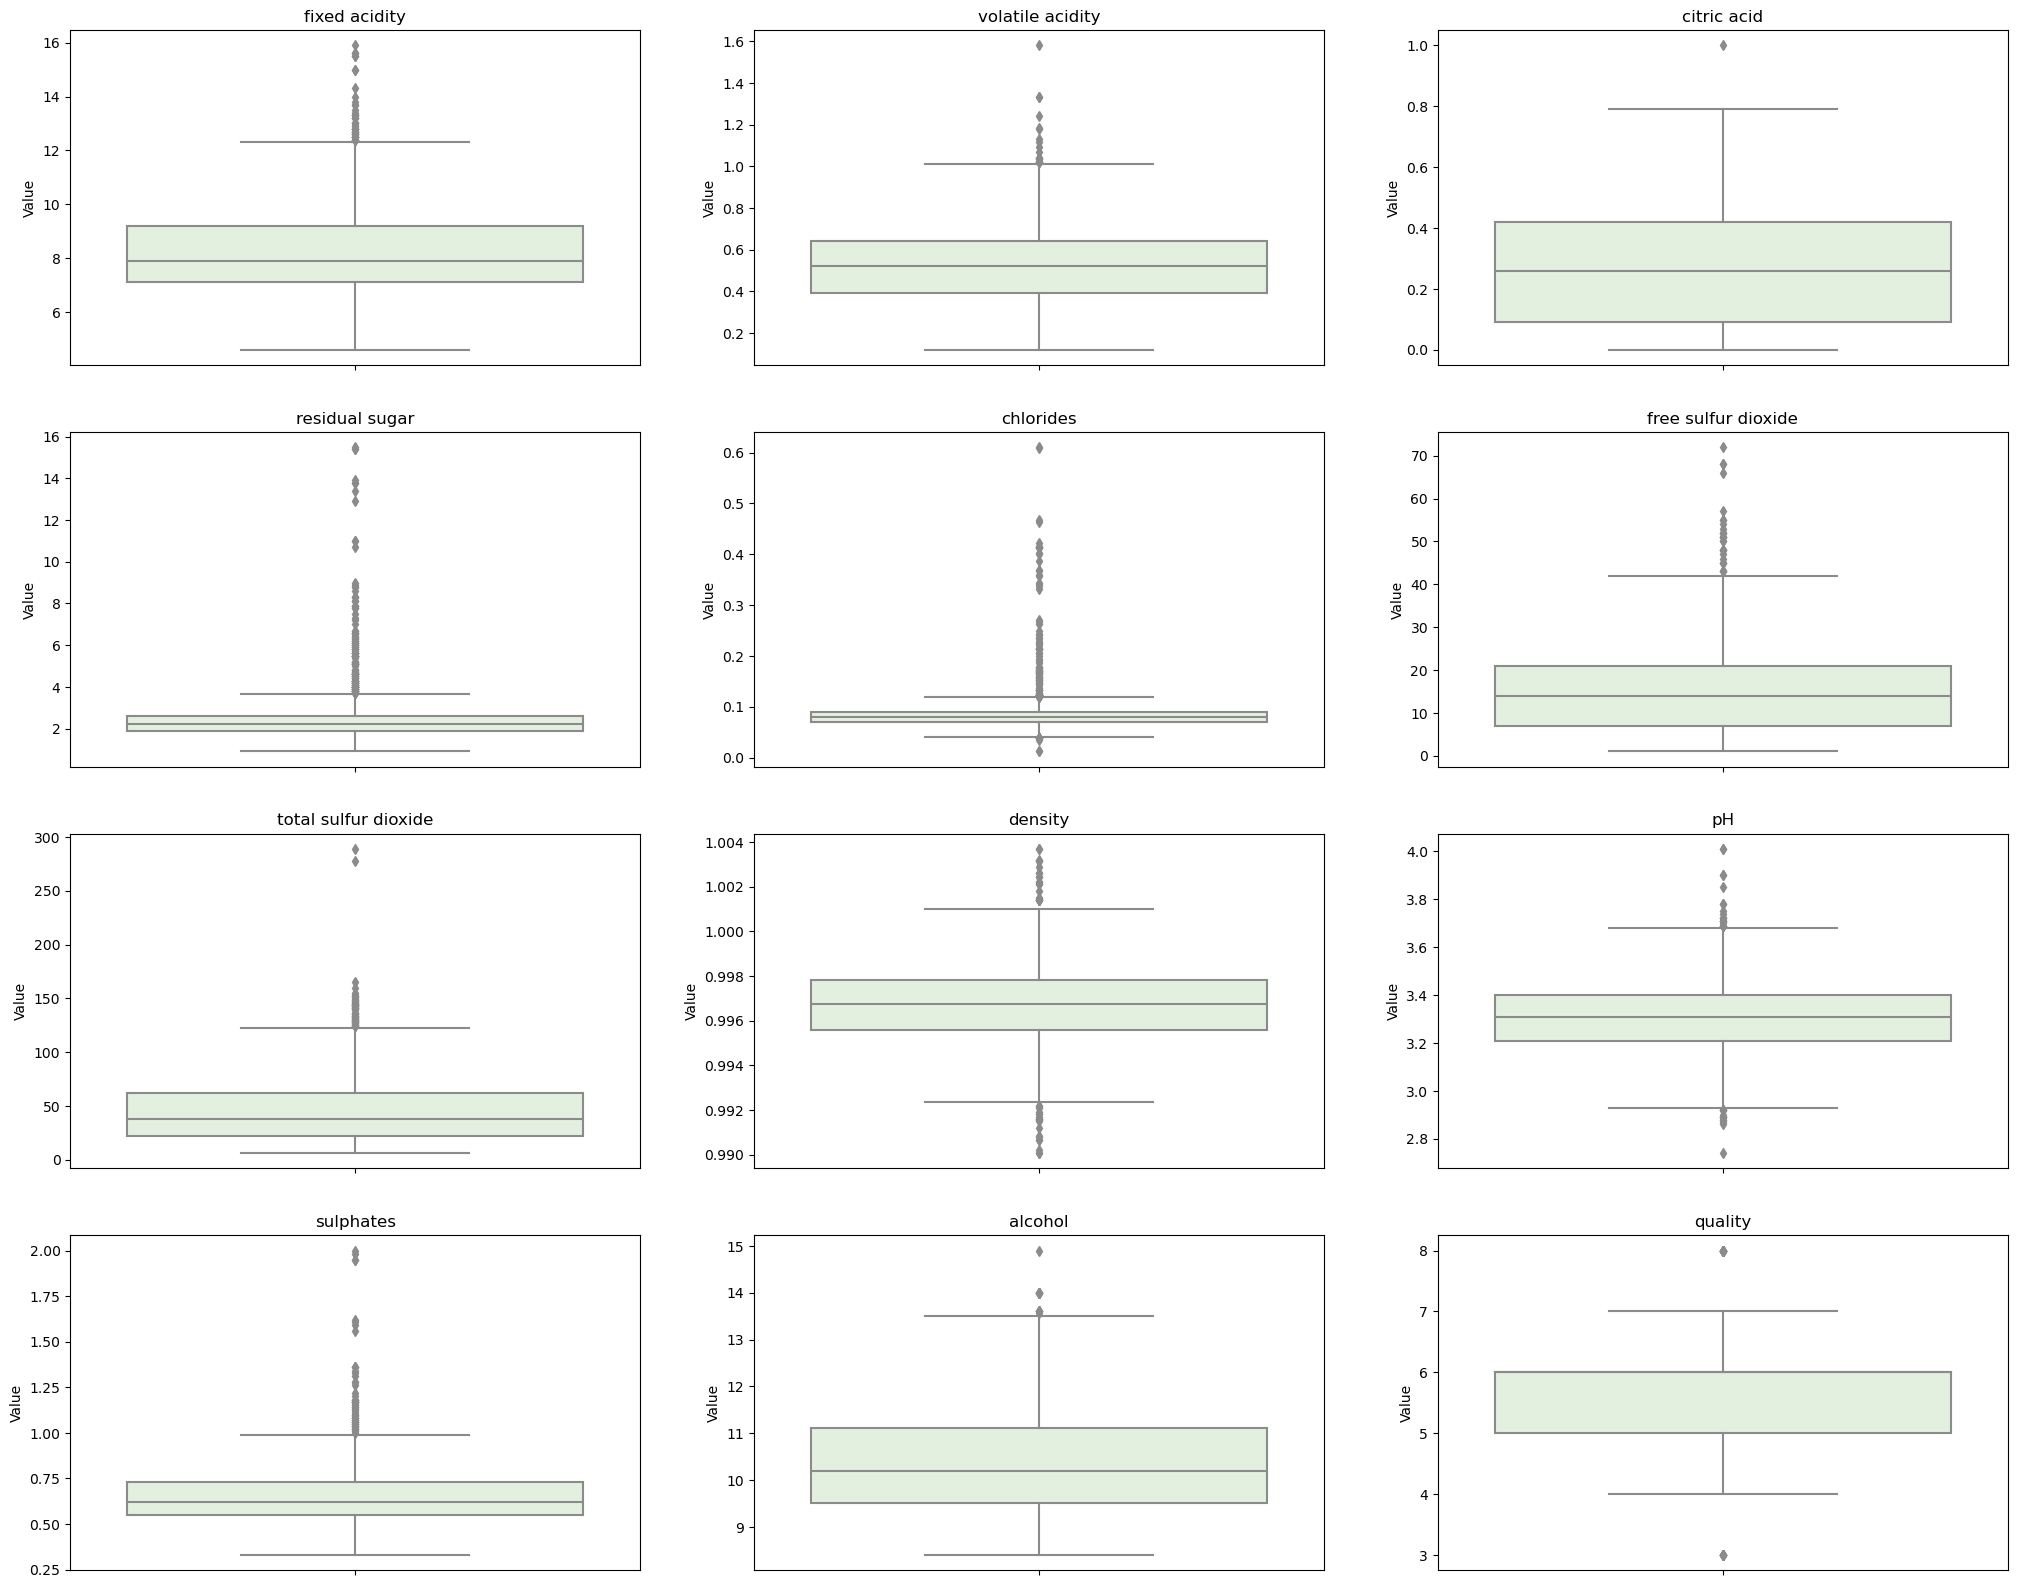

In [126]:
# Set up the matplotlib figure with 2 rows and 6 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Create a box plot for each feature
for ax, column in zip(axes, df.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Value')
    ax.set_xlabel('')

#plt.tight_layout()
plt.show()

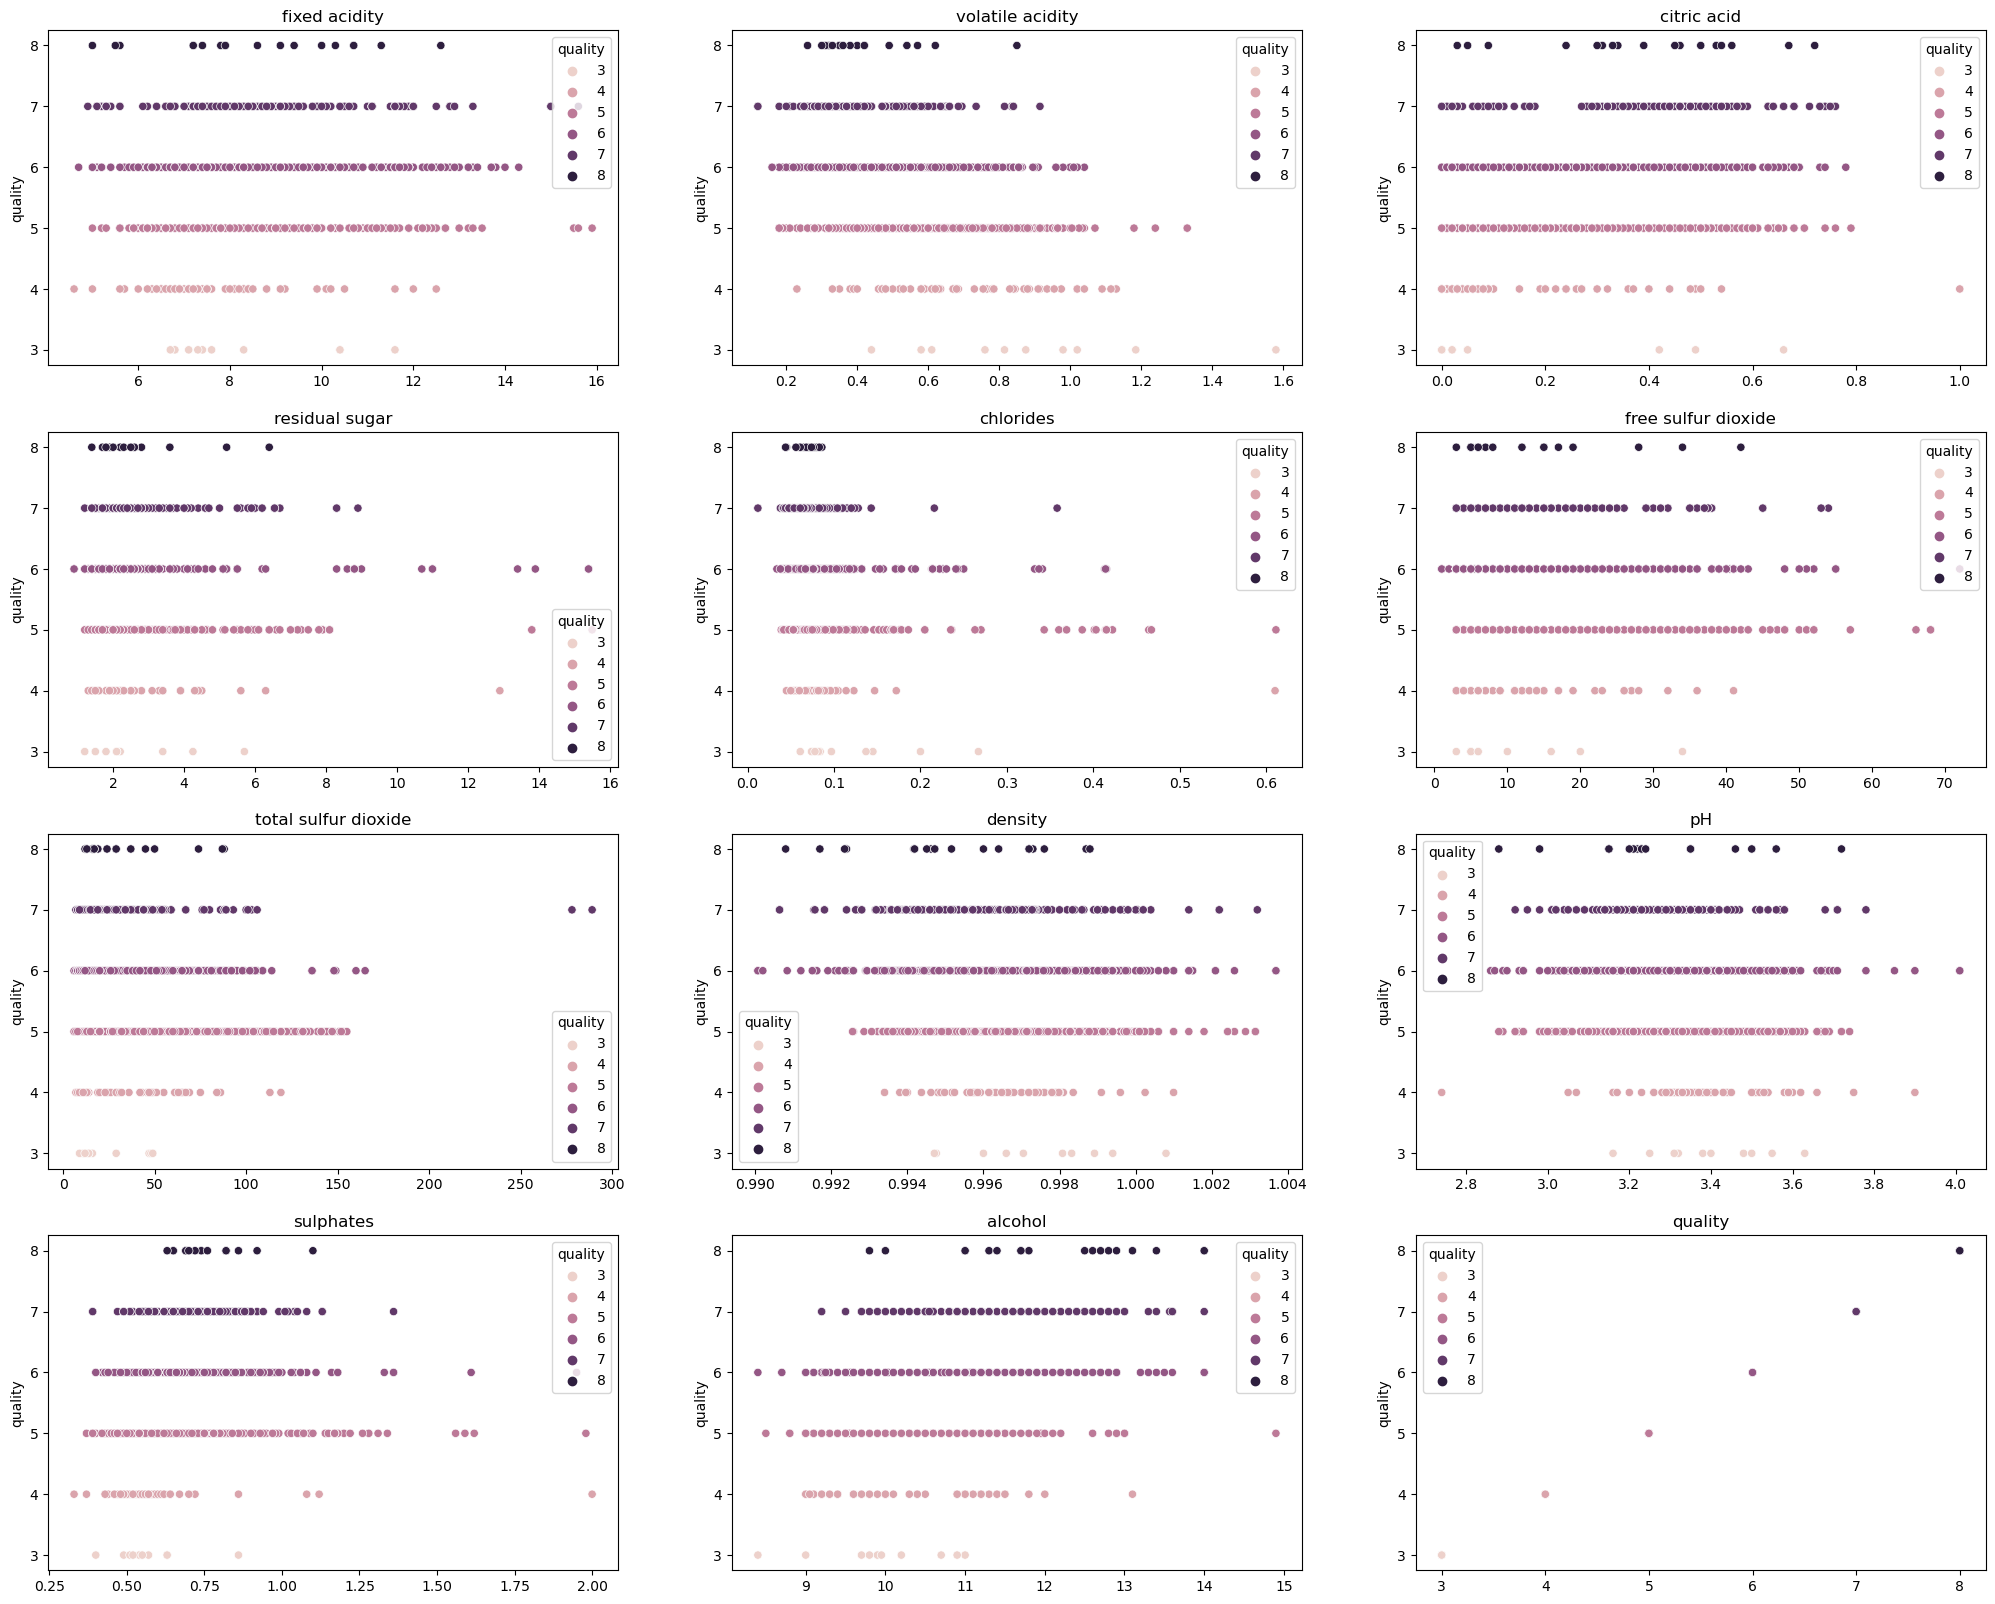

In [127]:
# Set up the matplotlib figure with 2 rows and 6 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Create a box plot for each feature
for ax, column in zip(axes, df.columns):
    sns.scatterplot(x=df[column],y='quality',data=df, hue='quality', ax=ax)
    ax.set_title(column)
    ax.set_ylabel('quality')
    ax.set_xlabel('')

#plt.tight_layout()
plt.show()

In [128]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


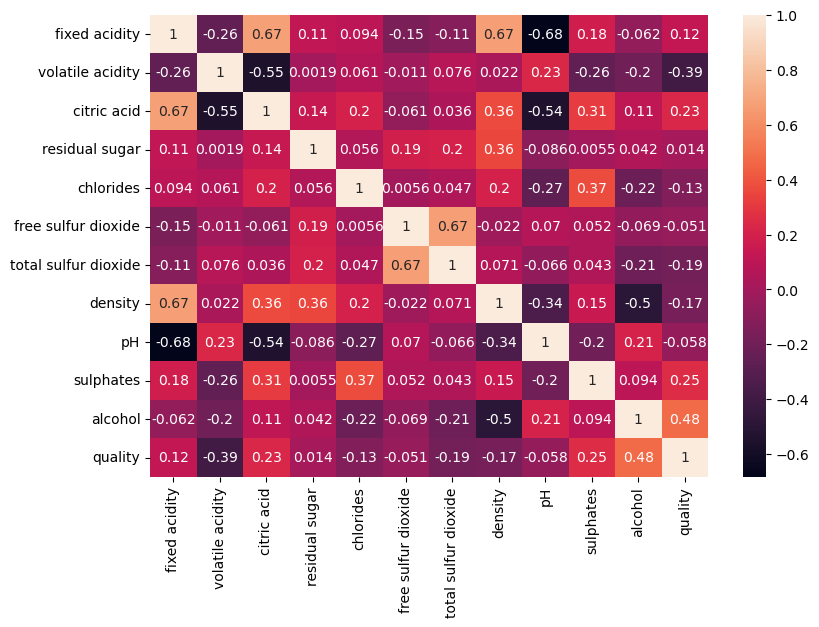

In [129]:
# checking correlation using heatmap

#plotting the heatmap for correlation
plt.figure(figsize=(9, 6))
ax = sns.heatmap(df.corr(), annot=True)

## The best correlations are found between: citric acid, fixed acidity, density,total sulfur dioxide and free sulfur dioxide with a value of 0.67

### Data modelling using different models

#### LinearRegression
#### ridge_regression
#### lasso_regression
#### RandomForestRegressor
#### SVC 
#### RandomForestClassifier 
#### KNeighborsClassifier


In [130]:
X = df.drop(columns='quality')
y = df['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [131]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
X = pd.DataFrame(scaler, columns=X.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free sulfur dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total sulfur dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
linear_model_score = linear_regression.score(X_test,y_test)
linear_model_score

0.3283887639580225

In [150]:
ridge_regression =Ridge(alpha = 0)
ridge_regression.fit(X_train,y_train)
ridge_model_score = ridge_regression.score(X_test,y_test)
ridge_model_score

0.32838876395802274

In [152]:
lasso_regression =Lasso(alpha = 0)
lasso_regression.fit(X_train,y_train)
lasso_model_score = lasso_regression.score(X_test,y_test)
lasso_model_score

0.32838876395802286

In [136]:
forest_regression = RandomForestRegressor(random_state=42)
forest_regression.fit(X_train, y_train)
forest_model_score = forest_regression.score(X_test,y_test)
forest_model_score

0.43464319344933466

In [137]:
result = pd.DataFrame({
    'Algorithm' : ['linear_model', 'ridge_model', 'lasso_model', 'forest_model'],
    'Score' : [linear_model_score, ridge_model_score, lasso_model_score, forest_model_score]
})

result.sort_values(by='Score', inplace=True)


sns.set_palette("Greens")



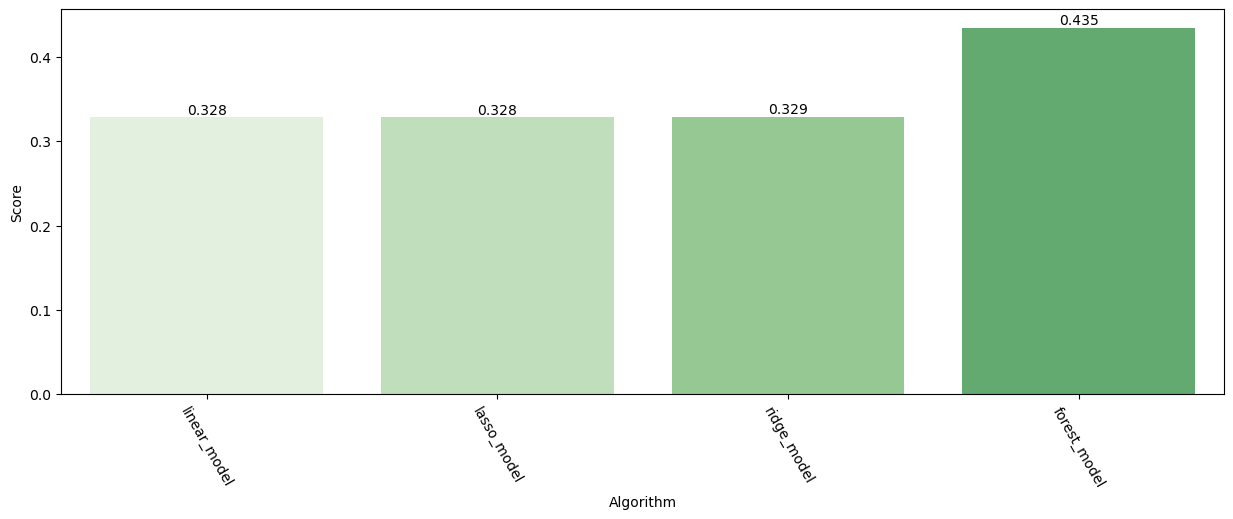

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

## SVC Model

In [139]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}
svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)
print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 100, 'gamma': 100}
accuracy :  0.6239665354330708


In [140]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [141]:
y_pred_svc = svc.predict(X_test)
svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.647


## RandomForestClassifier

In [142]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 150}
accuracy :  0.6896577380952381


In [143]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [144]:
y_pred_rf = rf.predict(X_test)
rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.709


## KNeighborsClassifier

In [145]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
accuracy :  0.6700848917322835


In [146]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [147]:
y_pred_knn = knn_cv.predict(X_test)

knn_score_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score_score)

KNeighborsClassifier Score : 0.678


In [148]:
result = pd.DataFrame({
    'Algorithm' : ['SVC', 'RandomForestClassifier', 'KNeighborsClassifier'],
    'Score' : [svc_score, rf_score, knn_score]
})
result.sort_values(by='Score', inplace=True)

sns.set_palette("Greens")

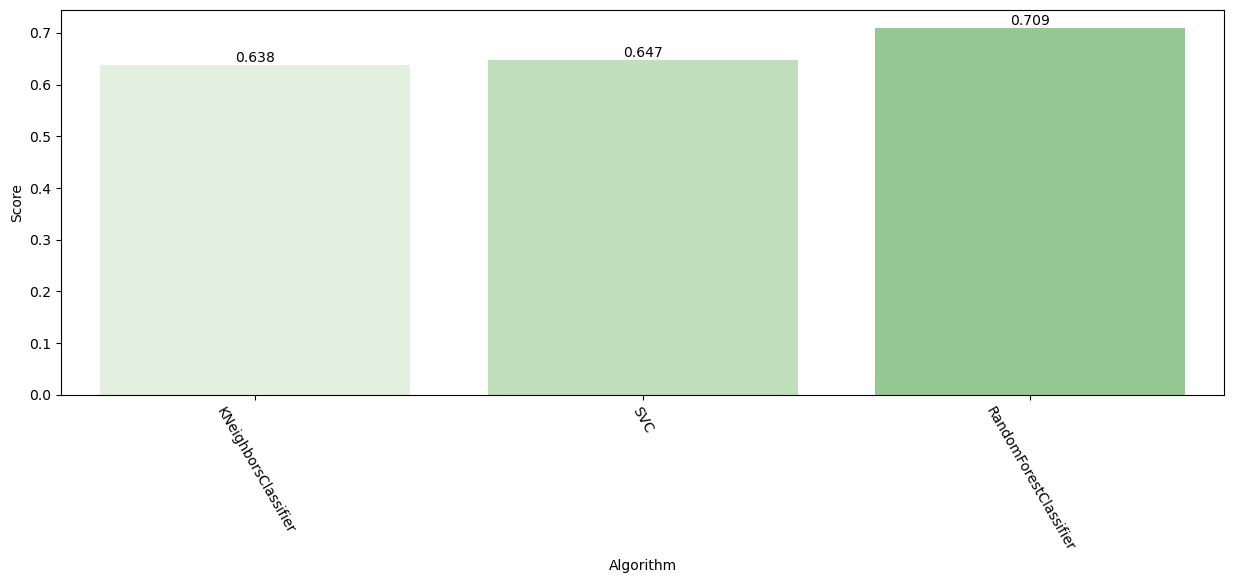

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

### According to this analysis the Random Forest Classifier gave the best score.

#### "Categorizing wine quality into discrete categories such as 'good,' 'middle,' and 'bad' could simplify the prediction task. Instead of predicting a continuous score, the model would predict discrete categories. I have not implemented this approach in my current analysis; however, I recognize that doing so might improve model accuracy. My primary goal for this project was to learn how to compare different models effectively. In my next project, I plan to explore feature engineering further and utilize techniques such as plotting confusion matrices and generating classification reports to evaluate model performance more comprehensively."